#Sesión 8 - Diplomado Data Science Duoc UC

# Módulo: Machine Learning

A continuación, aprenderás construir un modelo de clasificación con el uso de las librerías de Python desde fuentes de datos que se encuentran en la web.

**Recuerda almacenar una copia de este Jupyter Notebook en tu Google Drive para poder ejecutar los bloques de código.**


---
El siguiente dataset tiene información de diferentes contagiados con coronavirus. Cabe recalcar que por aspectos de privacidad de la información estos datasets no incorporan ningún dato personal del registro, es netamente de síntomas.

El dataset completo es de solo columnas binarias (0 o 1). 

Para este ejercicio se realizará un modelo de clasificación donde nuestra etiqueta será si la persona muere o no muere por coronavirus.

Las features que tiene son las siguientes:

* Fiebre
* Cansancio
* Tos seca
* Dificultad para respirar
* Dolor de garganta
* Ningún síntoma
* Dolores
* Congestión nasal 
* Mucosidad nasal 
* Diarrea 
* Ninguna experiencia
* Edad 0-9 
* Edad 10-19 
* Edad 20-24 
* Edad 25-59 
* Edad 60 + 
* Género Femenino 
* Género Masculino 
* Transgénero 
* Severidad leve
* Severidad moderada
* Severidad ninguna 
* Severidad grave
* Desconoce si tuvo contacto
* No tuvo contacto
* Si tuvo contacto
* Murió





In [ ]:
#Configuración de alineamiento para gráficos
%pylab inline
# Repositorio de trabajo
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("precision",5)

# Preparación de los datos
from sklearn import preprocessing

#from sklearn.preprocessing import Normalizer,StandardScaler

# Herramienta para divir los datos en prueba y entrenamiento 
from sklearn.model_selection import RepeatedKFold,train_test_split

#Import de los modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

# Exportar el modelo y trabajarlo desde afuera
from sklearn.externals import joblib
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Si el recurso lo tienes en drive, puedes montar tu google Drive y hacer referencia a la ruta del dataset en el siguiente código

from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=True)
 
path = "/content/drive/My Drive/Diplomado DS Duoc/Sesión 8 - Covid-19"  #Esta es la ruta
!ls /content/drive/My\ Drive/Diplomado\ DS\ Duoc/Sesión\ 8\ -\ Covid-19

df = pd.read_csv(path+"/Covid 19/Covid-19-symptoms.csv", sep=";")

Mounted at /content/drive
'Covid 19'


In [ ]:
#Si el dataset lo tienes local con el notebook, puedes establecer el path o la ruta de estos

#df = pd.read_csv(
#   "/content/Covid-19-symptoms.csv",
#    sep=";"
#)
#df = df[:-1]

In [ ]:
# Información del DF
print(df.shape)

# Conociendo el DF
print(df.head(5))

# Describiendo el DF
print(df.describe())

# Conociendo la información
print(df.info())

# Cantidad de muertos
print(df.groupby("Death").size())

(316800, 27)
   Fever  Tiredness  Dry-Cough  ...  Contact_No  Contact_Yes  Death
0      1          1          1  ...           0            1      1
1      1          1          1  ...           1            0      1
2      1          1          1  ...           0            0      1
3      1          1          1  ...           0            1      1
4      1          1          1  ...           1            0      1

[5 rows x 27 columns]
              Fever  Tiredness  ...   Contact_Yes         Death
count  316800.00000   316800.0  ...  316800.00000  316800.00000
mean        0.31250        0.5  ...       0.33333       0.61364
std         0.46351        0.5  ...       0.47141       0.48692
min         0.00000        0.0  ...       0.00000       0.00000
25%         0.00000        0.0  ...       0.00000       0.00000
50%         0.00000        0.5  ...       0.00000       1.00000
75%         1.00000        1.0  ...       1.00000       1.00000
max         1.00000        1.0  ...       1.

In [ ]:
## Conociendo la correlación
datos = df.astype(float)
print(datos.corr())

                               Fever    Tiredness  ...  Contact_Yes        Death
Fever                    1.00000e+00  4.04520e-01  ... -3.17567e-17  2.07695e-01
Tiredness                4.04520e-01  1.00000e+00  ...  0.00000e+00  3.73408e-01
Dry-Cough                5.09647e-02  3.77964e-01  ...  9.89065e-18  4.76331e-01
Difficulty-in-Breathing -1.34840e-01  0.00000e+00  ...  0.00000e+00  3.73408e-01
Sore-Throat             -1.63636e-01 -1.34840e-01  ... -3.17567e-17  2.07695e-01
None_Sympton            -1.74078e-01 -2.58199e-01  ...  1.38203e-18 -1.80775e-01
Pains                   -4.52672e-16  2.09907e-17  ...  3.33810e-17  2.11702e-01
Nasal-Congestion         5.17495e-16  0.00000e+00  ...  7.16646e-18  3.53656e-01
Runny-Nose              -1.02026e-16  0.00000e+00  ...  7.16646e-18  3.53656e-01
Diarrhea                 1.35789e-16  6.99156e-18  ...  3.33810e-17  2.11702e-01
None_Experiencing       -2.43012e-16 -1.75615e-17  ...  1.24101e-17 -1.54983e-01
Age_0-9                  0.0

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Death'],
      dtype='object')


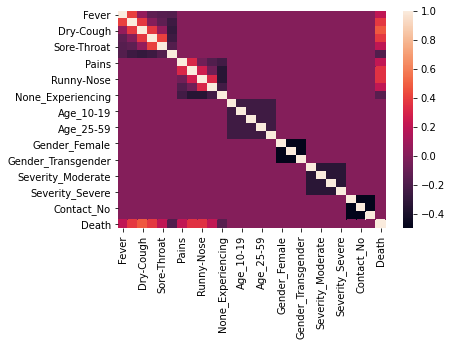

In [ ]:
sns.heatmap(
    datos.corr()
)
print(df.columns)

In [ ]:
caracteristicas =[
  'Fever',
  'Tiredness', 
  'Dry-Cough', 
  'Difficulty-in-Breathing',
  'Sore-Throat', 
  'Pains',
  'Nasal-Congestion', 
  'Runny-Nose',
  'Diarrhea'
]
data = datos[caracteristicas][1:] # X
clas = datos["Death"][1:] # Y
print(data,clas)

        Fever  Tiredness  Dry-Cough  ...  Nasal-Congestion  Runny-Nose  Diarrhea
1         1.0        1.0        1.0  ...               1.0         1.0       1.0
2         1.0        1.0        1.0  ...               1.0         1.0       1.0
3         1.0        1.0        1.0  ...               1.0         1.0       1.0
4         1.0        1.0        1.0  ...               1.0         1.0       1.0
5         1.0        1.0        1.0  ...               1.0         1.0       1.0
...       ...        ...        ...  ...               ...         ...       ...
316795    0.0        0.0        0.0  ...               0.0         0.0       0.0
316796    0.0        0.0        0.0  ...               0.0         0.0       0.0
316797    0.0        0.0        0.0  ...               0.0         0.0       0.0
316798    0.0        0.0        0.0  ...               0.0         0.0       0.0
316799    0.0        0.0        0.0  ...               0.0         0.0       0.0

[316799 rows x 9 columns] 1

In [ ]:
rKFold = RepeatedKFold(
    n_splits = 75,
    n_repeats = 15,
    random_state = 7
)
for p_entrenamiento,p_prueba in rKFold.split(data,clas):
  datos_entrenamiento, datos_prueba = data.iloc[p_entrenamiento],data.iloc[p_prueba]
  clasi_entrenamiento,clasi_prueba = clas.iloc[p_entrenamiento],clas.iloc[p_prueba]
print("El uso de datos para entrenamiento es {}, : {}".format(
    datos_entrenamiento.shape,clasi_entrenamiento.shape
))
print("El uso de datos para prueba es {}, : {}".format(
    datos_prueba.shape,clasi_prueba.shape
))

El uso de datos para entrenamiento es (312576, 9), : (312576,)
El uso de datos para prueba es (4223, 9), : (4223,)


In [ ]:
# Modelos de ML
# KNeighborsClassifier
# LogisticRegression
# SVC
# GaussianNB
# LinearDiscriminantAnalysis
# DecisionTreeClassifier
modelos = []
modelos.append(("KNC",KNeighborsClassifier()))
modelos.append(("LR",LogisticRegression()))
modelos.append(("SVC",SVC(gamma="auto")))
modelos.append(("GNV",GaussianNB()))
modelos.append(("LDA",LinearDiscriminantAnalysis()))
modelos.append(("DTC",DecisionTreeClassifier()))

for nombre,modelo in modelos:
  modelo.fit(datos_entrenamiento,clasi_entrenamiento)
  resultado = modelo.score(datos_prueba,clasi_prueba)
  print("El modelo {modelo}, tiene una presición de {presi:.3f}%".format(
      modelo=nombre,
      presi=resultado*100
  ))

El modelo KNC, tiene una presición de 100.000%
El modelo LR, tiene una presición de 97.135%
El modelo SVC, tiene una presición de 100.000%
El modelo GNV, tiene una presición de 95.998%
El modelo LDA, tiene una presición de 96.259%
El modelo DTC, tiene una presición de 100.000%


In [ ]:
modelo_final = modelos[4][1] # Obtener el modelo de la posición 1 y su modelo como tal
predict = modelo_final.predict(datos_prueba)
print(predict, "\n",clasi_prueba)


[1. 1. 1. ... 1. 0. 0.] 
 46        1.0
59        1.0
226       1.0
228       1.0
498       0.0
         ... 
316230    0.0
316235    0.0
316333    1.0
316375    0.0
316480    0.0
Name: Death, Length: 4223, dtype: float64


In [ ]:
# Predecir
#modelo_final.predict(X_entrenamiento)
""" 
'Fever',
'Tiredness', 
'Dry-Cough', 
'Difficulty-in-Breathing',
'Sore-Throat', 
'Pains',
'Nasal-Congestion',
'Runny-Nose',
'Diarrhea'

"""
modelo_final.predict([[1,1,0,0,0,1,1,1,1]])

array([1.])

#Cuestionario Covid-19

Ingrese 1 si su respuesta es afirmativa y un 0 si no presenta los síntomas consultados

In [1]:
#Recuerde solo ingresar 0 o 1. El estudiante puede robustecer el código para las validaciones de ser necesario.
print("¿Tiene fiebre?") 
fiebre = int(input("Responda: "))
print("¿Siente cansancio?")
cansancio = int(input( "Responda: "))
print("¿Tiene tos seca?")
tos = int(input("Responda: "))
print("¿Tiene dificultades resptiratorias?")
respiroDificultoso = int(input("Responda: "))
print("¿Siente dolor de garganta?")
dolorGarganta = int(input("Responda: "))
print("¿Siente dolores en el cuerpo?")
dolores = int(input("Responda: "))
print("¿Tiene congestión nasal?")
congestionNasal = int(input("Responda: "))
print("¿Tiene mucosidad nasal?")
mucosidadNasal = int(input("Responda: "))
print("¿Tiene diarrea?")
diarrea = int(input("Responda: "))
resultado = modelo_final.predict([[fiebre,cansancio,tos,respiroDificultoso,dolorGarganta,dolores,congestionNasal,mucosidadNasal,diarrea]])
print("El diagnóstico es que {res}".format(
    res=(resultado==1 and 'tienes riesgo de fallecer, acude a urgencias' or 'te recuperarás, quédate en casa')
))

¿Tiene fiebre?


KeyboardInterrupt: ignored